<a href="https://colab.research.google.com/github/anshudaur/DeepLearning/blob/master/MNIST_Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

MNIST Classification

In [136]:
import tensorflow as tf
from tensorflow import keras
import numpy as np
import matplotlib.pyplot as plt
from datasets import MNISTDataset
tf.__version__ 

'2.2.0-rc3'

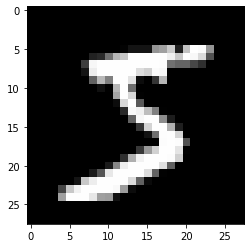

In [181]:
mnist = tf.keras.datasets.mnist
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

train_images = train_images / 255.0
test_images = test_images / 255.0

plt.imshow(train_images[0], cmap="Greys_r")

data = MNISTDataset(train_images.reshape([-1, 784]), train_labels, 
                    test_images.reshape([-1, 784]), test_labels,
                    batch_size=128)

In [182]:
train_steps = 1000
learning_rate = 0.1
# Outputs random values from a uniform distribution
tf.random.uniform( shape=[],minval=-0.1,maxval=0.1, dtype=tf.dtypes.float32,seed=10)

<tf.Tensor: shape=(), dtype=float32, numpy=0.020330332>

MNIST dataset

# Multilayer Perceptron

> 2 Hidden layers with RELU activation function : 11.35% test accuracy

> Sigmoid activation function at the last layer







In [183]:

#random initialization of weights and bias tensors(multi-dimensional arrays)
#weights and biases for first hidden layer
W1 = tf.Variable(np.zeros([784, 128]), dtype=tf.float32) 
b1 = tf.Variable(np.zeros([128]), dtype=tf.float32)
#weights and biases for second hidden layer
W2 = tf.Variable(np.zeros([128, 64]), dtype=tf.float32) 
b2 = tf.Variable(np.zeros([64]), dtype=tf.float32)
#weights and biases for output layer
W3 = tf.Variable(np.zeros([64, 10]), dtype=tf.float32) 
b3 = tf.Variable(np.zeros([10]), dtype=tf.float32)

for step in range(train_steps):
    img_batch, lbl_batch = data.next_batch()
    with tf.GradientTape() as tape:        
        hidden_layer_1_input =  tf.add(tf.matmul(img_batch, W1), b1)
        hidden_layer_1_output = tf.nn.relu(hidden_layer_1_input)
        hidden_layer_2_input =  tf.add(tf.matmul(hidden_layer_1_output, W2),b2)
        hidden_layer_2_output= tf.nn.relu(hidden_layer_2_input)
        logits = tf.nn.sigmoid(tf.add(tf.matmul(hidden_layer_2_output, W3),b3))
        xent = tf.reduce_mean(tf.nn.sparse_softmax_cross_entropy_with_logits(
            logits=logits, labels=lbl_batch))
    #automatic differentiation    
    grads = tape.gradient(xent, [W1, b1, W2, b2, W3, b3])
    W1.assign_sub(learning_rate * grads[0])
    b1.assign_sub(learning_rate * grads[1])
    W2.assign_sub(learning_rate * grads[2])
    b2.assign_sub(learning_rate * grads[3])
    W3.assign_sub(learning_rate * grads[4])
    b3.assign_sub(learning_rate * grads[5])
  
    if not step % 100:
        preds = tf.argmax(logits, axis=1, output_type=tf.int32)
        acc = tf.reduce_mean(tf.cast(tf.equal(preds, lbl_batch),
                            tf.float32))
        print("Loss: {} Accuracy: {}".format(xent, acc))

Loss: 2.3025851249694824 Accuracy: 0.1015625
Loss: 2.302812099456787 Accuracy: 0.078125
Loss: 2.3027336597442627 Accuracy: 0.125
Loss: 2.3033456802368164 Accuracy: 0.0703125
Loss: 2.301438570022583 Accuracy: 0.125
Starting new epoch...
Loss: 2.301176071166992 Accuracy: 0.1484375
Loss: 2.3023271560668945 Accuracy: 0.1171875
Loss: 2.3022499084472656 Accuracy: 0.1171875
Loss: 2.3000330924987793 Accuracy: 0.09375
Loss: 2.301468849182129 Accuracy: 0.1015625
Starting new epoch...


In [184]:
pred_layer1 = tf.nn.relu(tf.matmul(data.test_data, W1) + b1) 
pred_layer2 = tf.nn.relu(tf.matmul(pred_layer1, W2) + b2) 
test_preds = tf.argmax(tf.nn.softmax(tf.matmul(pred_layer2, W3) + b3), axis=1, output_type=tf.int32)
acc = tf.reduce_mean(tf.cast(tf.equal(test_preds, data.test_labels),
                             tf.float32))
print(acc)

tf.Tensor(0.1135, shape=(), dtype=float32)


# Multilayer Perceptron : single hidden layer model

> 1 hidden layer with RELU activation function : 82% test accuracy



In [185]:
train_steps = 1000
learning_rate = 0.1

W = tf.Variable(np.zeros([784, 10]).astype(np.float32))
b = tf.Variable(np.zeros(10, dtype=np.float32))

for step in range(train_steps):
    img_batch, lbl_batch = data.next_batch()
    with tf.GradientTape() as tape:
        logits = tf.matmul(img_batch, W) + b
        xent = tf.reduce_mean(tf.nn.sparse_softmax_cross_entropy_with_logits(logits=logits, labels=lbl_batch))
        
    grads = tape.gradient(xent, [W, b])
    W.assign_sub(learning_rate * grads[0])
    b.assign_sub(learning_rate * grads[1])
    
    if not step % 100:
        preds = tf.argmax(logits, axis=1, output_type=tf.int32)
        acc = tf.reduce_mean(tf.cast(tf.equal(preds, lbl_batch),tf.float32))
        print("epoch:{} / {}".format(step,train_steps)+"Loss: {} Accuracy: {}".format(xent, acc))

epoch:0 / 1000Loss: 2.3025851249694824 Accuracy: 0.1171875
epoch:100 / 1000Loss: 2.3004682064056396 Accuracy: 0.1015625
epoch:200 / 1000Loss: 2.299160957336426 Accuracy: 0.1328125
epoch:300 / 1000Loss: 2.296037197113037 Accuracy: 0.140625
epoch:400 / 1000Loss: 2.3029394149780273 Accuracy: 0.0859375
Starting new epoch...
epoch:500 / 1000Loss: 2.2974483966827393 Accuracy: 0.1640625
epoch:600 / 1000Loss: 2.2980539798736572 Accuracy: 0.125
epoch:700 / 1000Loss: 2.3048200607299805 Accuracy: 0.0859375
epoch:800 / 1000Loss: 2.2928032875061035 Accuracy: 0.140625
Starting new epoch...
epoch:900 / 1000Loss: 2.290800094604492 Accuracy: 0.125


In [186]:
print("Loss: {} Accuracy: {}".format(xent, acc))

Loss: 2.3023014068603516 Accuracy: 0.125


In [135]:
logits_model2 = tf.nn.relu(tf.matmul(data.test_data, W4) + b4) 
test_preds = tf.argmax(tf.add(tf.matmul(logits_model2, W5) , b5), axis=1, output_type=tf.int32)

acc = tf.reduce_mean(tf.cast(tf.equal(test_preds, data.test_labels),
                             tf.float32))
print(acc)

tf.Tensor(0.8242, shape=(), dtype=float32)




> The accuracy of MLP with 2 hidden layers and sigmoid activation function at the last layer decreases drastically to 11% in comparison to the actual linear model provided as part of exercise solution .

> The accuracy of MLP with 1 hidden layer  is 72.6% which is better than a more  complex model.

**Custom function for MLP Network** accepting paramters for layer dimensions, epochs, learning rate and activation functions created.


In [0]:
import numpy as np

#Network parameters
input_layer = 784    #24x24 images flattened
output_layer = 10
learning_rate = 0.1

class Network:  
  def update_weights(self, index, gradient):
        self.weights[index].assign_sub(self.learning_rate * gradient)
        
  def update_bias(self, index, gradient):
        self.bias[index].assign_sub(self.learning_rate * gradient)        
        
  def __init__(self, dimensions, learning_rate, activation_function):
       # "dimensions" : dimension of the network. (input, hidden layers, output)
       # "activations" : for activation funtion 
      
    self.dimen = dimensions
    self.no_of_layers = len(dimensions)
    self.loss = None
    self.learning_rate = learning_rate

    # Weights and bias 
    self.weights = {}
    self.bias = {}
    self.activation = activation_function

    for i in range(len(dimensions) - 1):
      self.bias[i + 1] = tf.Variable(np.zeros(dimensions[i + 1], dtype=np.float32))# bias initialised to zero
      self.weights[i + 1] = tf.Variable(tf.random.normal([dimensions[i], dimensions[i + 1]], 0, .1)) #weights initialised to random normal between -1 and 1


In [0]:
def train(net, train_steps): 
  for step in range(train_steps):
      img_batch, lbl_batch = data.next_batch()
      parameters =[]
      with tf.GradientTape() as tape:
          hidden_layer = img_batch #input layer
          for layer in range(len(net.dimen) - 2): #2 for input and output layer
              if(net.activation == "tanh"):
                hidden_layer = tf.nn.tanh(tf.matmul(hidden_layer, net.weights[layer+1]) + net.bias[layer+1])
              else:
                hidden_layer = tf.nn.relu(tf.matmul(hidden_layer, net.weights[layer+1]) + net.bias[layer+1])
              parameters.append(net.weights[layer+1]) 
              parameters.append(net.bias[layer+1])
   
          last_layer_index = len(net.dimen)-1 # output layer
          parameters.append(net.weights[last_layer_index])
          parameters.append(net.bias[last_layer_index]) # 10 mnist labels
          logits = tf.matmul(hidden_layer, net.weights[last_layer_index]) + net.bias[last_layer_index]
          xent = tf.reduce_mean(tf.nn.sparse_softmax_cross_entropy_with_logits(logits=logits, labels=lbl_batch))
         
      grads = tape.gradient(xent, parameters)
      for param_index in range(1,len(parameters),2):
        net.update_weights(param_index//2 + 1,grads[param_index-1]) #first param for W
        net.update_bias(param_index//2 + 1,grads[param_index]) #second param for b

        if not step % 100:
          preds = tf.argmax(logits, axis=1, output_type=tf.int32)
          acc = tf.reduce_mean(tf.cast(tf.equal(preds, lbl_batch),tf.float32))
          print("epoch:{} / {}".format(step,train_steps)+" Loss: {} Accuracy: {}".format(xent, acc))

In [0]:
def test(net):
    hidden_layer = data.test_data 
    for layer in range(len(net.dimen) - 2): 
      hidden_layer = tf.nn.relu(tf.matmul(hidden_layer, net.weights[layer+1]) + net.bias[layer+1])
           
    last_layer_index = len(net.dimen)-1 # output layer
    logits = tf.nn.sigmoid(tf.matmul(hidden_layer, net.weights[last_layer_index]) + net.bias[last_layer_index])
    test_preds = tf.argmax(logits, axis=1, output_type=tf.int32)

    acc = tf.reduce_mean(tf.cast(tf.equal(test_preds, data.test_labels),tf.float32))
    print("Test accuracy: {}".format(acc))

Single- hidden layer

In [171]:
learning_rate = 0.1
net = Network((784,256, 10), learning_rate, "relu")
train(net, 1000)
test(net)

epoch:0 / 1000 Loss: 2.3026344776153564 Accuracy: 0.1328125
epoch:0 / 1000 Loss: 2.3026344776153564 Accuracy: 0.1328125
epoch:100 / 1000 Loss: 2.302067279815674 Accuracy: 0.0859375
epoch:100 / 1000 Loss: 2.302067279815674 Accuracy: 0.0859375
epoch:200 / 1000 Loss: 2.29679274559021 Accuracy: 0.1171875
epoch:200 / 1000 Loss: 2.29679274559021 Accuracy: 0.1171875
epoch:300 / 1000 Loss: 2.295921564102173 Accuracy: 0.1171875
epoch:300 / 1000 Loss: 2.295921564102173 Accuracy: 0.1171875
Starting new epoch...
epoch:400 / 1000 Loss: 2.2940824031829834 Accuracy: 0.1328125
epoch:400 / 1000 Loss: 2.2940824031829834 Accuracy: 0.1328125
epoch:500 / 1000 Loss: 2.2877655029296875 Accuracy: 0.0859375
epoch:500 / 1000 Loss: 2.2877655029296875 Accuracy: 0.0859375
epoch:600 / 1000 Loss: 2.2941079139709473 Accuracy: 0.1015625
epoch:600 / 1000 Loss: 2.2941079139709473 Accuracy: 0.1015625
epoch:700 / 1000 Loss: 2.289069414138794 Accuracy: 0.125
epoch:700 / 1000 Loss: 2.289069414138794 Accuracy: 0.125
epoch:80

In [172]:
learning_rate = 0.1
net = Network((784,256,128, 10), learning_rate, "relu")
train(net, 1000)
test(net)

epoch:0 / 1000 Loss: 2.3022518157958984 Accuracy: 0.15625
epoch:0 / 1000 Loss: 2.3022518157958984 Accuracy: 0.15625
epoch:0 / 1000 Loss: 2.3022518157958984 Accuracy: 0.15625
epoch:100 / 1000 Loss: 2.2936315536499023 Accuracy: 0.125
epoch:100 / 1000 Loss: 2.2936315536499023 Accuracy: 0.125
epoch:100 / 1000 Loss: 2.2936315536499023 Accuracy: 0.125
epoch:200 / 1000 Loss: 2.2980496883392334 Accuracy: 0.0625
epoch:200 / 1000 Loss: 2.2980496883392334 Accuracy: 0.0625
epoch:200 / 1000 Loss: 2.2980496883392334 Accuracy: 0.0625
epoch:300 / 1000 Loss: 2.296198606491089 Accuracy: 0.1640625
epoch:300 / 1000 Loss: 2.296198606491089 Accuracy: 0.1640625
epoch:300 / 1000 Loss: 2.296198606491089 Accuracy: 0.1640625
Starting new epoch...
epoch:400 / 1000 Loss: 2.2984964847564697 Accuracy: 0.1171875
epoch:400 / 1000 Loss: 2.2984964847564697 Accuracy: 0.1171875
epoch:400 / 1000 Loss: 2.2984964847564697 Accuracy: 0.1171875
epoch:500 / 1000 Loss: 2.282299518585205 Accuracy: 0.15625
epoch:500 / 1000 Loss: 2.

To experiment i am using keras layers instead of custom function onwards:
MLP with 1 layer , relu activation function and Mean Squared error as loss function : 11.9% test accuracy

In [103]:
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28, 28)),
    keras.layers.Dense(128, activation='relu'),
    keras.layers.Dense(10,activation='softmax')
])

model.compile(optimizer='sgd',
              loss=tf.keras.losses.MeanSquaredError(),
              metrics=['accuracy'])

model.fit(train_images, train_labels, epochs=10)

Epoch 1/10
1875/1875 [==============================] - 3s 2ms/step - loss: 27.3055 - accuracy: 0.1282
Epoch 2/10
1875/1875 [==============================] - 3s 2ms/step - loss: 27.3051 - accuracy: 0.1310
Epoch 3/10
1875/1875 [==============================] - 3s 2ms/step - loss: 27.3050 - accuracy: 0.1261
Epoch 4/10
1875/1875 [==============================] - 3s 2ms/step - loss: 27.3049 - accuracy: 0.1231
Epoch 5/10
1875/1875 [==============================] - 3s 2ms/step - loss: 27.3049 - accuracy: 0.1224
Epoch 6/10
1875/1875 [==============================] - 3s 2ms/step - loss: 27.3048 - accuracy: 0.1221
Epoch 7/10
1875/1875 [==============================] - 3s 2ms/step - loss: 27.3048 - accuracy: 0.1225
Epoch 8/10
1875/1875 [==============================] - 3s 2ms/step - loss: 27.3048 - accuracy: 0.1225
Epoch 9/10
1875/1875 [==============================] - 3s 2ms/step - loss: 27.3048 - accuracy: 0.1220
Epoch 10/10
1875/1875 [==============================] - 3s 2ms/step - lo

In [104]:
model.evaluate(test_images,  test_labels)

313/313 [==============================] - 1s 2ms/step - loss: 27.2433 - accuracy: 0.1193


[27.243349075317383, 0.1193000003695488]

MLP with 2 layers , relu activation function and Mean Squared error as loss function : 11.5% test accuracy

> Takeaway : Model performance does not improves , so next I will try using different loss function to optimize 



In [99]:
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28, 28)),
    keras.layers.Dense(128, activation='relu'),
    keras.layers.Dense(128, activation='relu'),
    keras.layers.Dense(10,activation='softmax')
])

model.compile(optimizer='sgd',
              loss=tf.keras.losses.MeanSquaredError(),
              metrics=['accuracy'])

model.fit(train_images, train_labels, epochs=10)

Epoch 1/10
1875/1875 [==============================] - 3s 2ms/step - loss: 27.3050 - accuracy: 0.1138
Epoch 2/10
1875/1875 [==============================] - 3s 2ms/step - loss: 27.3047 - accuracy: 0.1112
Epoch 3/10
1875/1875 [==============================] - 3s 2ms/step - loss: 27.3047 - accuracy: 0.1104
Epoch 4/10
1875/1875 [==============================] - 3s 2ms/step - loss: 27.3047 - accuracy: 0.1112
Epoch 5/10
1875/1875 [==============================] - 3s 2ms/step - loss: 27.3046 - accuracy: 0.1124
Epoch 6/10
1875/1875 [==============================] - 3s 2ms/step - loss: 27.3046 - accuracy: 0.1138
Epoch 7/10
1875/1875 [==============================] - 3s 2ms/step - loss: 27.3046 - accuracy: 0.1140
Epoch 8/10
1875/1875 [==============================] - 3s 2ms/step - loss: 27.3046 - accuracy: 0.1141
Epoch 9/10
1875/1875 [==============================] - 3s 2ms/step - loss: 27.3047 - accuracy: 0.1145
Epoch 10/10
1875/1875 [==============================] - 3s 2ms/step - lo

In [100]:
model.evaluate(test_images,  test_labels)

313/313 [==============================] - 0s 2ms/step - loss: 27.2432 - accuracy: 0.1150


[27.243179321289062, 0.11500000208616257]

Keras MLP implementation with relu and softmax activation function and Sparse Categorical Cross Entropy : 97.7 % test accuracy

In [0]:
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28, 28)),
    keras.layers.Dense(128, activation='relu'),
    keras.layers.Dense(10,activation='softmax')
])

model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [71]:
model.fit(train_images, train_labels, epochs=10)

Epoch 1/10
1875/1875 [==============================] - 3s 2ms/step - loss: 1.5685 - accuracy: 0.9088
Epoch 2/10
1875/1875 [==============================] - 3s 2ms/step - loss: 1.5152 - accuracy: 0.9511
Epoch 3/10
1875/1875 [==============================] - 3s 2ms/step - loss: 1.5013 - accuracy: 0.9636
Epoch 4/10
1875/1875 [==============================] - 3s 2ms/step - loss: 1.4938 - accuracy: 0.9702
Epoch 5/10
1875/1875 [==============================] - 3s 2ms/step - loss: 1.4883 - accuracy: 0.9753
Epoch 6/10
1875/1875 [==============================] - 3s 2ms/step - loss: 1.4849 - accuracy: 0.9787
Epoch 7/10
1875/1875 [==============================] - 3s 2ms/step - loss: 1.4819 - accuracy: 0.9812
Epoch 8/10
1875/1875 [==============================] - 3s 2ms/step - loss: 1.4793 - accuracy: 0.9836
Epoch 9/10
1875/1875 [==============================] - 3s 2ms/step - loss: 1.4778 - accuracy: 0.9846
Epoch 10/10
1875/1875 [==============================] - 3s 2ms/step - loss: 1.475

In [73]:
model.evaluate(test_images,  test_labels)

313/313 [==============================] - 1s 2ms/step - loss: 1.4855 - accuracy: 0.9768


[1.4854873418807983, 0.9768000245094299]

Keras MLP with 2 hidden layers using relu activation function and Sparse Categorical Cross Entropy as the loss function: 97.9% test accuracy

In [76]:
model1 = keras.Sequential([
    keras.layers.Flatten(input_shape=(28, 28)),
    keras.layers.Dense(128, activation='relu'),
    keras.layers.Dense(128, activation='relu'),
    keras.layers.Dense(10,activation='sigmoid')
])

model1.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

model1.fit(train_images, train_labels, epochs=10)

Epoch 1/10
1875/1875 [==============================] - 3s 2ms/step - loss: 1.5477 - accuracy: 0.9173
Epoch 2/10
1875/1875 [==============================] - 3s 2ms/step - loss: 1.4962 - accuracy: 0.9600
Epoch 3/10
1875/1875 [==============================] - 3s 2ms/step - loss: 1.4868 - accuracy: 0.9702
Epoch 4/10
1875/1875 [==============================] - 3s 2ms/step - loss: 1.4817 - accuracy: 0.9754
Epoch 5/10
1875/1875 [==============================] - 4s 2ms/step - loss: 1.4787 - accuracy: 0.9790
Epoch 6/10
1875/1875 [==============================] - 3s 2ms/step - loss: 1.4761 - accuracy: 0.9828
Epoch 7/10
1875/1875 [==============================] - 3s 2ms/step - loss: 1.4747 - accuracy: 0.9839
Epoch 8/10
1875/1875 [==============================] - 3s 2ms/step - loss: 1.4734 - accuracy: 0.9854
Epoch 9/10
1875/1875 [==============================] - 3s 2ms/step - loss: 1.4719 - accuracy: 0.9872
Epoch 10/10
1875/1875 [==============================] - 3s 2ms/step - loss: 1.471

In [77]:
model1.evaluate(test_images,  test_labels)

313/313 [==============================] - 1s 2ms/step - loss: 1.4793 - accuracy: 0.9794


[1.4792577028274536, 0.9793999791145325]

Multilayer Perceptron on Fashion MNIST


> Use Sparse Categorical Cross Entropy loss function as it worked better for mnist dataset









9


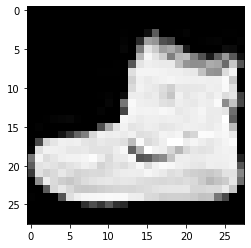

In [105]:
from datasets import MNISTDataset
fmnist = tf.keras.datasets.fashion_mnist
(train_images, train_labels), (test_images, test_labels) = fmnist.load_data()

train_images = train_images / 255.0
test_images = test_images / 255.0

print(train_labels[0])
plt.imshow(train_images[0], cmap="Greys_r")

data = MNISTDataset(train_images.reshape([-1, 784]), train_labels, 
                    test_images.reshape([-1, 784]), test_labels,
                    batch_size=128)

MLP Model with 1 Hidden layer and relu activation function : 86% test accuracy

---



In [82]:
fmnist_mlp_model_1 = keras.Sequential([
    keras.layers.Flatten(input_shape=(28, 28)),
    keras.layers.Dense(128, activation='relu'),
    keras.layers.Dense(10,activation='softmax')
])

fmnist_mlp_model_1.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])
fmnist_mlp_model_1.fit(train_images, train_labels, epochs=10)

Epoch 1/10
1875/1875 [==============================] - 3s 2ms/step - loss: 1.6662 - accuracy: 0.8051
Epoch 2/10
1875/1875 [==============================] - 3s 2ms/step - loss: 1.6201 - accuracy: 0.8435
Epoch 3/10
1875/1875 [==============================] - 3s 2ms/step - loss: 1.6108 - accuracy: 0.8523
Epoch 4/10
1875/1875 [==============================] - 3s 2ms/step - loss: 1.6028 - accuracy: 0.8598
Epoch 5/10
1875/1875 [==============================] - 3s 2ms/step - loss: 1.5975 - accuracy: 0.8644
Epoch 6/10
1875/1875 [==============================] - 3s 2ms/step - loss: 1.5934 - accuracy: 0.8687
Epoch 7/10
1875/1875 [==============================] - 3s 2ms/step - loss: 1.5882 - accuracy: 0.8739
Epoch 8/10
1875/1875 [==============================] - 3s 2ms/step - loss: 1.5856 - accuracy: 0.8767
Epoch 9/10
1875/1875 [==============================] - 3s 2ms/step - loss: 1.5831 - accuracy: 0.8789
Epoch 10/10
1875/1875 [==============================] - 3s 2ms/step - loss: 1.579

In [83]:
fmnist_mlp_model_1.evaluate(test_images,  test_labels)

313/313 [==============================] - 0s 2ms/step - loss: 1.5966 - accuracy: 0.8644


[1.5966033935546875, 0.8644000291824341]

MLP model with 2 hidden layers with relu activation function : 

> Layer 1 : 128 units,relu


> Layer 2 : 64 units,relu

> 10 epochs : 86% test accuracy


In [124]:
fmnist_mlp_model_2 = keras.Sequential([
    keras.layers.Flatten(input_shape=(28, 28)),
    keras.layers.Dense(128, activation='relu'),
    keras.layers.Dense(64, activation='relu'),
    keras.layers.Dense(10,activation='softmax')
])

fmnist_mlp_model_2.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])
fmnist_mlp_model_2.fit(train_images, train_labels, epochs=10)

Epoch 1/10
1875/1875 [==============================] - 4s 2ms/step - loss: 1.7407 - accuracy: 0.7240
Epoch 2/10
1875/1875 [==============================] - 4s 2ms/step - loss: 1.6476 - accuracy: 0.8151
Epoch 3/10
1875/1875 [==============================] - 3s 2ms/step - loss: 1.6118 - accuracy: 0.8495
Epoch 4/10
1875/1875 [==============================] - 3s 2ms/step - loss: 1.6040 - accuracy: 0.8569
Epoch 5/10
1875/1875 [==============================] - 3s 2ms/step - loss: 1.5973 - accuracy: 0.8637
Epoch 6/10
1875/1875 [==============================] - 3s 2ms/step - loss: 1.5933 - accuracy: 0.8677
Epoch 7/10
1875/1875 [==============================] - 4s 2ms/step - loss: 1.5892 - accuracy: 0.8718
Epoch 8/10
1875/1875 [==============================] - 4s 2ms/step - loss: 1.5868 - accuracy: 0.8742
Epoch 9/10
1875/1875 [==============================] - 4s 2ms/step - loss: 1.5858 - accuracy: 0.8749
Epoch 10/10
1875/1875 [==============================] - 4s 2ms/step - loss: 1.584

In [125]:
fmnist_mlp_model_2.evaluate(test_images,  test_labels)

313/313 [==============================] - 1s 2ms/step - loss: 1.6009 - accuracy: 0.8596


[1.6008858680725098, 0.8596000075340271]

MLP model with 1 layer and tanh activation function : 87% test accuracy

In [86]:
fmnist_mlp_model_3 = keras.Sequential([
    keras.layers.Flatten(input_shape=(28, 28)),
    keras.layers.Dense(128, activation='tanh'),
    keras.layers.Dense(10,activation='softmax')
])

fmnist_mlp_model_3.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])
fmnist_mlp_model_3.fit(train_images, train_labels, epochs=10)

Epoch 1/10
1875/1875 [==============================] - 3s 2ms/step - loss: 1.7138 - accuracy: 0.7547
Epoch 2/10
1875/1875 [==============================] - 3s 2ms/step - loss: 1.6693 - accuracy: 0.7940
Epoch 3/10
1875/1875 [==============================] - 3s 2ms/step - loss: 1.6259 - accuracy: 0.8388
Epoch 4/10
1875/1875 [==============================] - 3s 2ms/step - loss: 1.5963 - accuracy: 0.8690
Epoch 5/10
1875/1875 [==============================] - 3s 2ms/step - loss: 1.5901 - accuracy: 0.8738
Epoch 6/10
1875/1875 [==============================] - 3s 2ms/step - loss: 1.5831 - accuracy: 0.8821
Epoch 7/10
1875/1875 [==============================] - 3s 2ms/step - loss: 1.5804 - accuracy: 0.8842
Epoch 8/10
1875/1875 [==============================] - 3s 2ms/step - loss: 1.5763 - accuracy: 0.8878
Epoch 9/10
1875/1875 [==============================] - 3s 2ms/step - loss: 1.5728 - accuracy: 0.8911
Epoch 10/10
1875/1875 [==============================] - 3s 2ms/step - loss: 1.570

In [0]:
fmnist_mlp_model_3.evaluate(test_images, test_labels)

MLP model with 2 layers and relu activation function :

> Layer 1 : 128 units, relu 


> Layer 2 : 64 units, relu

> 10 epochs :  86% test accuracy

> 30 epochs : 81% test accuracy









In [126]:
fmnist_mlp_model_4 = keras.Sequential([
    keras.layers.Flatten(input_shape=(28, 28)),
    keras.layers.Dense(128, activation='relu'),
    keras.layers.Dense(128, activation='relu'),
    keras.layers.Dense(10,activation='softmax')
])

fmnist_mlp_model_4.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

fmnist_mlp_model_4.fit(train_images, train_labels, epochs=30)

Epoch 1/30
1875/1875 [==============================] - 4s 2ms/step - loss: 1.7461 - accuracy: 0.7183
Epoch 2/30
1875/1875 [==============================] - 3s 2ms/step - loss: 1.6763 - accuracy: 0.7850
Epoch 3/30
1875/1875 [==============================] - 4s 2ms/step - loss: 1.6694 - accuracy: 0.7911
Epoch 4/30
1875/1875 [==============================] - 3s 2ms/step - loss: 1.6645 - accuracy: 0.7962
Epoch 5/30
1875/1875 [==============================] - 3s 2ms/step - loss: 1.6576 - accuracy: 0.8035
Epoch 6/30
1875/1875 [==============================] - 3s 2ms/step - loss: 1.6590 - accuracy: 0.8014
Epoch 7/30
1875/1875 [==============================] - 4s 2ms/step - loss: 1.6525 - accuracy: 0.8084
Epoch 8/30
1875/1875 [==============================] - 4s 2ms/step - loss: 1.6540 - accuracy: 0.8066
Epoch 9/30
1875/1875 [==============================] - 4s 2ms/step - loss: 1.6515 - accuracy: 0.8092
Epoch 10/30
1875/1875 [==============================] - 4s 2ms/step - loss: 1.650

In [127]:
fmnist_mlp_model_4.evaluate(test_images, test_labels)

313/313 [==============================] - 1s 2ms/step - loss: 1.6600 - accuracy: 0.8010


[1.6600499153137207, 0.8009999990463257]

MLP model with 2 layers and tanh activation function :

> Layer 1 : 128 units, tanh 


> Layer 2 : 64 units, tanh

> 10 epochs :  86% test accuracy

> 30 epochs : 86% test accuracy









In [111]:
fmnist_mlp_model_5 = keras.Sequential([
    keras.layers.Flatten(input_shape=(28, 28)),
    keras.layers.Dense(128, activation='tanh'),
    keras.layers.Dense(64, activation='tanh'),
    keras.layers.Dense(10,activation='softmax')
])

fmnist_mlp_model_5.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])
fmnist_mlp_model_5.fit(train_images, train_labels, epochs=30)

fmnist_mlp_model_5.evaluate(test_images, test_labels)

Epoch 1/30
1875/1875 [==============================] - 4s 2ms/step - loss: 1.6594 - accuracy: 0.8101
Epoch 2/30
1875/1875 [==============================] - 4s 2ms/step - loss: 1.6153 - accuracy: 0.8479
Epoch 3/30
1875/1875 [==============================] - 4s 2ms/step - loss: 1.6070 - accuracy: 0.8553
Epoch 4/30
1875/1875 [==============================] - 3s 2ms/step - loss: 1.5980 - accuracy: 0.8644
Epoch 5/30
1875/1875 [==============================] - 4s 2ms/step - loss: 1.5945 - accuracy: 0.8676
Epoch 6/30
1875/1875 [==============================] - 3s 2ms/step - loss: 1.5889 - accuracy: 0.8727
Epoch 7/30
1875/1875 [==============================] - 3s 2ms/step - loss: 1.5858 - accuracy: 0.8759
Epoch 8/30
1875/1875 [==============================] - 3s 2ms/step - loss: 1.5842 - accuracy: 0.8776
Epoch 9/30
1875/1875 [==============================] - 3s 2ms/step - loss: 1.5815 - accuracy: 0.8805
Epoch 10/30
1875/1875 [==============================] - 3s 2ms/step - loss: 1.579

[1.5942496061325073, 0.8672000169754028]

In [113]:
fmnist_mlp_model_5.evaluate(test_images, test_labels)

313/313 [==============================] - 1s 2ms/step - loss: 1.5942 - accuracy: 0.8672


[1.5942496061325073, 0.8672000169754028]

MLP model with 2 dense layers, one with relu and second layer with tanh activation : 

> Layer 1 : 128 units, relu

> Layer 2 : 128 units, tanh

> 10 epochs : 86.4% test accuracy

> 30 epochs : 88% test accuracy

> Takeaway: using different activation functions within the same model does not improve model performance



In [108]:
fmnist_mlp_model_6 = keras.Sequential([
    keras.layers.Flatten(input_shape=(28, 28)),
    keras.layers.Dense(128, activation='relu'),
    keras.layers.Dense(128, activation='tanh'),
    keras.layers.Dense(10,activation='softmax')
])

fmnist_mlp_model_6.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])
fmnist_mlp_model_6.fit(train_images, train_labels, epochs=30)

fmnist_mlp_model_6.evaluate(test_images, test_labels)

Epoch 1/30
1875/1875 [==============================] - 4s 2ms/step - loss: 1.6627 - accuracy: 0.8042
Epoch 2/30
1875/1875 [==============================] - 4s 2ms/step - loss: 1.6149 - accuracy: 0.8463
Epoch 3/30
1875/1875 [==============================] - 4s 2ms/step - loss: 1.6058 - accuracy: 0.8554
Epoch 4/30
1875/1875 [==============================] - 3s 2ms/step - loss: 1.5988 - accuracy: 0.8622
Epoch 5/30
1875/1875 [==============================] - 3s 2ms/step - loss: 1.5932 - accuracy: 0.8684
Epoch 6/30
1875/1875 [==============================] - 4s 2ms/step - loss: 1.5904 - accuracy: 0.8701
Epoch 7/30
1875/1875 [==============================] - 4s 2ms/step - loss: 1.5865 - accuracy: 0.8743
Epoch 8/30
1875/1875 [==============================] - 4s 2ms/step - loss: 1.5833 - accuracy: 0.8778
Epoch 9/30
1875/1875 [==============================] - 4s 2ms/step - loss: 1.5828 - accuracy: 0.8779
Epoch 10/30
1875/1875 [==============================] - 3s 2ms/step - loss: 1.578

[1.5794687271118164, 0.8813999891281128]

Observations :

> Random initialization of weights : Weights initialized to zero will output results as if they are the linear combination of weights which are eventually learned over inputs through various layers. So, our output will remain symmetric to our input as during forward propagation and backpropagation our weights will be identical/symmetric to the weights of previous layers. Hence, In order to truly learn we want the weights to be random.

> Epochs : Training the model for more epochs improved accuracy.

> Activation Function : RELU activation function gave better accuracy for model as compared to tanh. Mixing activation function like relu and tanh within 2 layer MLP also improved the accuracy.

> Loss Function : Changing the loss function from mean squared error to sparse cross entropy improved accuracy. MSE loss function does not work great for high dimensional data like images.

> Change in layer dimensions for 2-layer model: 2-layer models in which layers dimension was reduced to half in the second layer didn't improve the accuracy even after executing for more epochs.








References:

1.   http://blog.ai.ovgu.de/posts/jens/2019/002_tf20_basic_mnist/index.html
2.   https://www.tensorflow.org/tutorials/keras/classification
3.   https://www.ritchievink.com/blog/2017/07/10/programming-a-neural-network-from-scratch/



